In [32]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [33]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [34]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [35]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [36]:
df['target'] = iris.target
df.head 

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

In [37]:
iris.target_names 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [38]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [39]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  


In [40]:
from matplotlib import pyplot as pl

In [41]:
%matplotlib inline 

In [42]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [43]:
df1. head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


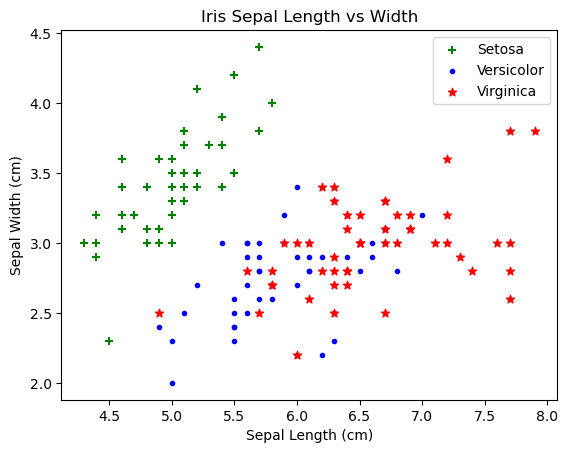

In [44]:
import matplotlib.pyplot as plt
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+', label='Setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.', label='Versicolor')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', marker='*', label='Virginica')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.title('Iris Sepal Length vs Width')
plt.show()

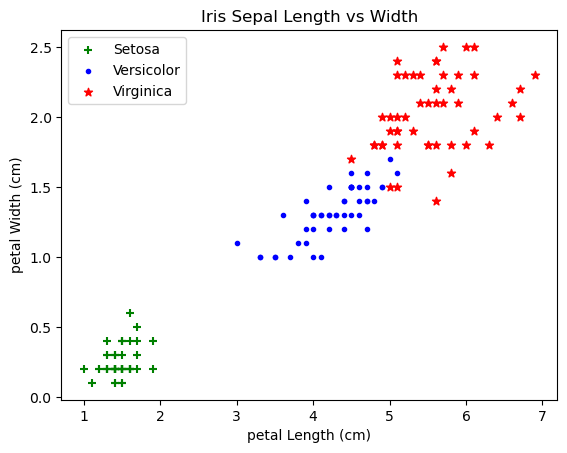

In [45]:
import matplotlib.pyplot as plt
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+', label='Setosa')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='.', label='Versicolor')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='red', marker='*', label='Virginica')
plt.xlabel('petal Length (cm)')
plt.ylabel('petal Width (cm)')
plt.legend()
plt.title('Iris Sepal Length vs Width')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x = df.drop(['target', 'flower_name'], axis = 'columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
y = df.target


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)


In [50]:
len(x_train)

120

In [51]:
len(x_test)

30

In [52]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')

In [53]:
model.fit (x_train, y_train )

SVC(kernel='linear')

In [54]:
model.score(x_test, y_test)

0.9666666666666667

In [55]:
accuracy = model.score(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.97


In [56]:
y_pred = model.predict(x_test)

In [58]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[12  0  0]
 [ 0  4  1]
 [ 0  0 13]]
